In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import rcParams
import sklearn
from sklearn import neighbors, datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
import jupyterthemes as jt
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [2]:
#load data and print dataframe
df = pd.read_excel('/Volumes/1.5TB.1/Documents/Uni/Psych/Thesis/Qualtrix dataset.xlsx')
print (df)

    5  5.1  5.2  5.3  5.4  118  1  1.1  0  1.2  ...   1.6  0.8571428571428571  \
0   4    4    4    4    4  109  1    0  0    0  ...  0.80            0.142857   
1   4    4    4    4    4  110  1    1  0    1  ...  0.80            0.571429   
2   4    4    4    4    4  128  1    1  0    1  ...  0.80            0.857143   
3   5    4    3    5    5  137  1    1  0    1  ...  0.88            0.571429   
4   4    5    5    3    3  145  1    1  0    1  ...  0.80            0.857143   
5   4    3    4    3    4  140  0    1  1    1  ...  0.72            0.714286   
6   3    3    3    3    3  105  0    0  0    0  ...  0.60            0.142857   
7   4    4    4    3    4  117  1    1  1    1  ...  0.76            0.857143   
8   4    5    4    3    4  107  0    0  0    1  ...  0.80            0.285714   
9   2    3    2    4    3  105  1    1  0    1  ...  0.56            0.857143   
10  4    4    4    4    4  103  0    0  0    0  ...  0.80            0.142857   
11  4    4    5    5    4  1

In [5]:
#assign labels to dataframe columns
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'IQ', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C1','C2','C3','C4','C5','C6','C7','C8','C9','Credit']

In [6]:
#assign values to X and y and print them
X=df[['A1', 'A2', 'A3', 'A4', 'A5', 'IQ', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C1', 'C2','C3', 'C4', 'C5','C6','C7','C8','C9']]
y=df[['Credit']]
print(X)
print(y)

    A1  A2  A3  A4  A5   IQ  B1  B2  B3  B4  ...  B7    C1        C2  \
0    4   4   4   4   4  109   1   0   0   0  ...   0  0.80  0.142857   
1    4   4   4   4   4  110   1   1   0   1  ...   1  0.80  0.571429   
2    4   4   4   4   4  128   1   1   0   1  ...   1  0.80  0.857143   
3    5   4   3   5   5  137   1   1   0   1  ...   0  0.88  0.571429   
4    4   5   5   3   3  145   1   1   0   1  ...   1  0.80  0.857143   
5    4   3   4   3   4  140   0   1   1   1  ...   1  0.72  0.714286   
6    3   3   3   3   3  105   0   0   0   0  ...   1  0.60  0.142857   
7    4   4   4   3   4  117   1   1   1   1  ...   1  0.76  0.857143   
8    4   5   4   3   4  107   0   0   0   1  ...   1  0.80  0.285714   
9    2   3   2   4   3  105   1   1   0   1  ...   1  0.56  0.857143   
10   4   4   4   4   4  103   0   0   0   0  ...   0  0.80  0.142857   
11   4   4   5   5   4  126   1   1   1   1  ...   1  0.88  1.000000   
12   4   4   4   3   3  141   1   1   0   1  ...   0  0.72  0.42

In [7]:
#normalise x values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)

df = pd.DataFrame(df)

In [8]:
X = df['C3'].values.reshape(-1,1)
y = df['Credit'].values

In [9]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [10]:
r2 = model.score(X, y)

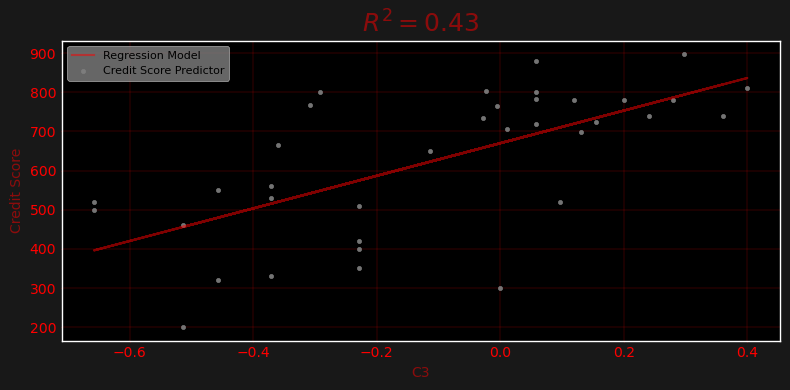

In [11]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='red', label='Regression Model', alpha=0.5)
ax.scatter(X, y, edgecolor='grey', facecolor='grey', alpha=0.9, label='Credit Score Predictor',s=9,color='r')
ax.set_ylabel('Credit Score', fontsize=10,color='r',alpha=0.5)
ax.set_xlabel('C3', fontsize=10, color='r', alpha=0.5)
ax.grid(color='r', linewidth=0.3, alpha=0.5)
ax.tick_params(colors='r', size=0.5,)

ax.legend(facecolor='grey', fontsize=8)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18, color='r', alpha=0.5)
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.9)
fig.tight_layout()

In [12]:
X = df['C4'].values.reshape(-1,1)
y = df['Credit'].values

In [13]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [14]:
r2 = model.score(X, y)

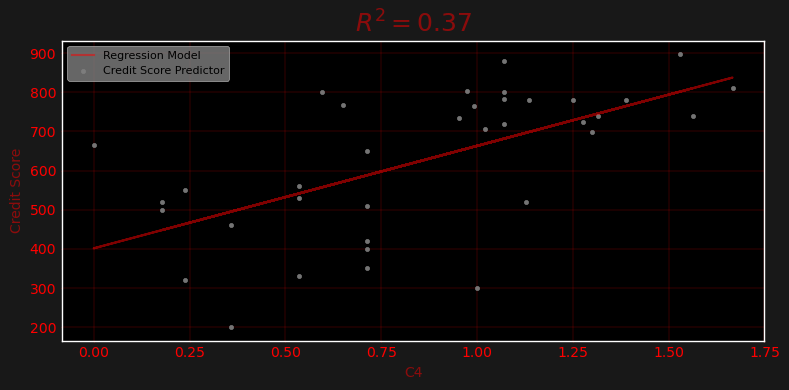

In [15]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='red', label='Regression Model', alpha=0.5)
ax.scatter(X, y, edgecolor='grey', facecolor='grey', alpha=0.9, label='Credit Score Predictor',s=9,color='r')
ax.set_ylabel('Credit Score', fontsize=10,color='r',alpha=0.5)
ax.set_xlabel('C4', fontsize=10, color='r', alpha=0.5)
ax.grid(color='r', linewidth=0.3, alpha=0.5)
ax.tick_params(colors='r', size=0.5,)

ax.legend(facecolor='grey', fontsize=8)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18, color='r', alpha=0.5)
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.9)
fig.tight_layout()

In [16]:
X = df['C6'].values.reshape(-1,1)
y = df['Credit'].values

In [17]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [18]:
r2 = model.score(X, y)

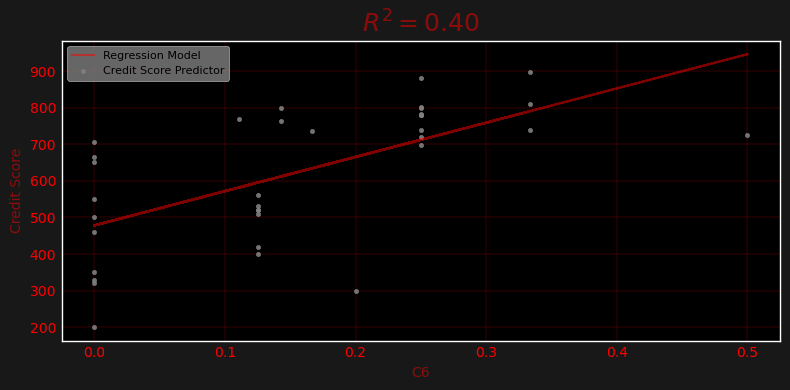

In [19]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='red', label='Regression Model', alpha=0.5)
ax.scatter(X, y, edgecolor='grey', facecolor='grey', alpha=0.9, label='Credit Score Predictor',s=9,color='r')
ax.set_ylabel('Credit Score', fontsize=10,color='r',alpha=0.5)
ax.set_xlabel('C6', fontsize=10, color='r', alpha=0.5)
ax.grid(color='r', linewidth=0.3, alpha=0.5)
ax.tick_params(colors='r', size=0.5,)

ax.legend(facecolor='grey', fontsize=8)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18, color='r', alpha=0.5)
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.9)
fig.tight_layout()

In [20]:
X = df['C8'].values.reshape(-1,1)
y = df['Credit'].values

In [21]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [22]:
r2 = model.score(X, y)

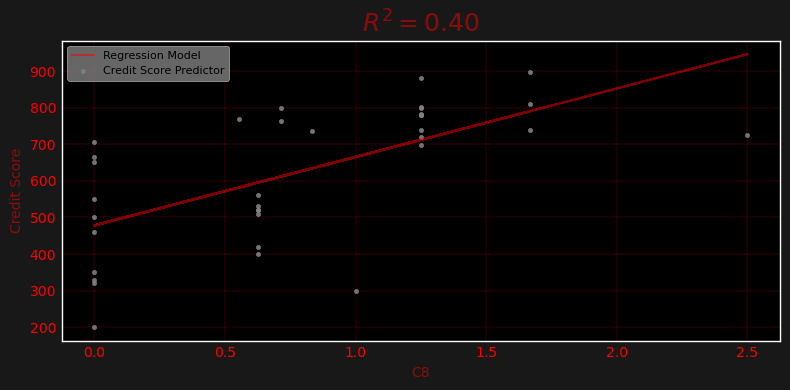

In [23]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='red', label='Regression Model', alpha=0.5)
ax.scatter(X, y, edgecolor='grey', facecolor='grey', alpha=0.9, label='Credit Score Predictor',s=9,color='r')
ax.set_ylabel('Credit Score', fontsize=10,color='r',alpha=0.5)
ax.set_xlabel('C8', fontsize=10, color='r', alpha=0.5)
ax.grid(color='r', linewidth=0.3, alpha=0.5)
ax.tick_params(colors='r', size=0.5,)

ax.legend(facecolor='grey', fontsize=8)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18, color='r', alpha=0.5)
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.9)
fig.tight_layout()

In [24]:
X = df['C9'].values.reshape(-1,1)
y = df['Credit'].values

In [25]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [26]:
r2 = model.score(X, y)

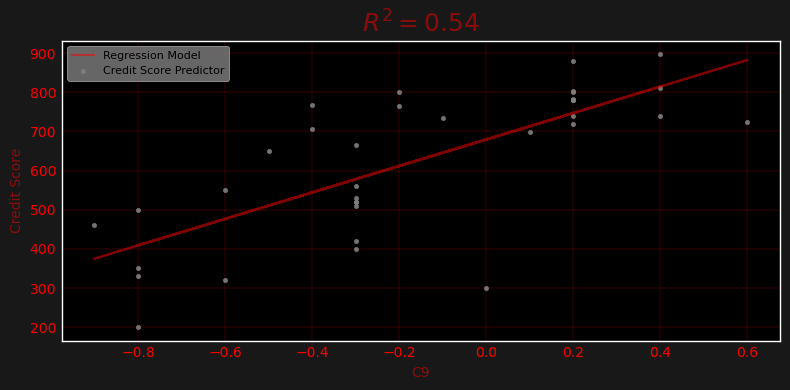

In [27]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='red', label='Regression Model', alpha=0.5)
ax.scatter(X, y, edgecolor='grey', facecolor='grey', alpha=0.9, label='Credit Score Predictor',s=9,color='r')
ax.set_ylabel('Credit Score', fontsize=10,color='r',alpha=0.5)
ax.set_xlabel('C9', fontsize=10, color='r', alpha=0.5)
ax.grid(color='r', linewidth=0.3, alpha=0.5)
ax.tick_params(colors='r', size=0.5,)

ax.legend(facecolor='grey', fontsize=8)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18, color='r', alpha=0.5)
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.9)
fig.tight_layout()

In [28]:
features = ['C9']
target = 'Credit'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

In [29]:
print(X.shape)
print(y.shape)

(36, 1)
(36,)


In [30]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [31]:
model.coef_

array([337.93270161])

In [32]:
model.intercept_

679.2224908141559

In [33]:
model.score(X, y)

0.5443015672758651

In [34]:
x_pred = np.array([0.2]) #input value predictor
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions

In [35]:
model.predict(x_pred) #predict credit score with one variable

array([746.80903114])

In [36]:
x_pred = np.array([0.2, 0.3])#multiple input values of predictor
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions

In [37]:
model.predict(x_pred) #predict credit score with multiple instances of the same variable

array([746.80903114, 780.6023013 ])

In [38]:
x_pred = np.linspace(0,0.5, 40)            
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions

y_pred = model.predict(x_pred)

Text(0.55, 0.15, '$y = 337.93 x_1 - 679.22 $')

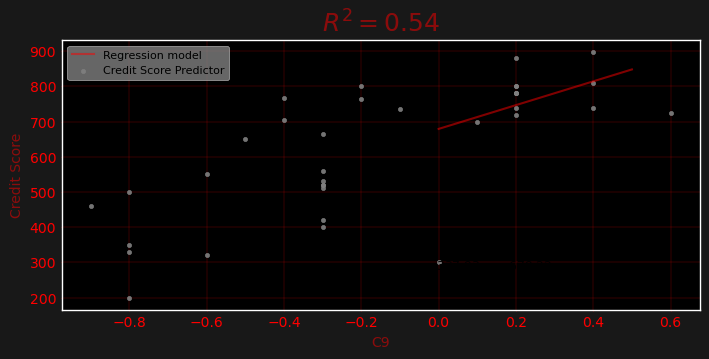

In [39]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(x_pred, y_pred,  color='red', label='Regression model',alpha=0.5)





ax.grid(color='r', linewidth=0.3, alpha=0.5)
ax.tick_params(colors='r', size=0.5,)

ax.set_title('$R^2= %.2f$' % r2, fontsize=18, color='r', alpha=0.5)
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.9)
fig.tight_layout()


ax.scatter(X, y, edgecolor='grey', facecolor='grey', alpha=0.9, label='Credit Score Predictor',s=9,color='r')
ax.set_ylabel('Credit Score', fontsize=10,color='r',alpha=0.5)
ax.set_xlabel('C9', fontsize=10, color='r', alpha=0.5)
ax.legend(facecolor='grey', fontsize=8)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=9, transform=ax.transAxes)


In [40]:
ols = linear_model.LinearRegression(fit_intercept=False)
model = ols.fit(X, y)

In [41]:
model.intercept_

0.0

In [42]:
features = ['C3','C5','C4','C1','B6','B2','IQ','C6','C7']
target = 'Credit'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [43]:
model.coef_

array([ -866.1590123 ,   -18.56122731,   467.61053165, -1287.39177905,
         371.35629397,   352.30836124,     6.30162928, -1525.84237219,
          32.36296234])

In [44]:
model.intercept_

297.9162224101435

In [45]:
model.score(X, y) #Print model accuracy

0.7419056081409501

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jupyterthemes as jt
import pandas as pd
import sklearn

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from keras.models import Sequential